In [1]:
import torchvision.models as models 
import torch
import torch.onnx

resnet=models.resnet50(pretrained=True,progress=False).eval()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


In [2]:
BATCH_SIZE=32

In [6]:
import numpy as np
x=np.random.uniform(size=(32,100,200,3))

In [7]:
x=torch.from_numpy(x).transpose(1,3)
x=x.transpose(2,3)

In [9]:
x.shape

torch.Size([32, 3, 100, 200])

In [12]:
from skimage import io
from skimage.transform import resize
from matplotlib import pyplot as plt
import numpy as np

In [13]:
url='https://images.dog.ceo/breeds/retriever-golden/n02099601_3004.jpg'

In [14]:
img=resize(io.imread(url),(224,224))

In [15]:
img=np.expand_dims(np.array(img,dtype=np.float32),axis=0)
input_batch=np.array(np.repeat(img,BATCH_SIZE,axis=0),dtype=np.float32)

In [16]:
input_batch.shape

(32, 224, 224, 3)

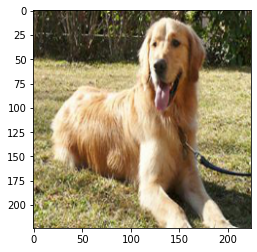

In [17]:
plt.imshow(input_batch[0])

In [19]:
resnet50=resnet.to("cuda").eval()

In [20]:
input_batch=torch.from_numpy(input_batch).transpose(1,3).transpose(2,3).to("cuda")
input_batch.shape

torch.Size([32, 3, 224, 224])

In [21]:
predictions = resnet50(input_batch).cpu().detach().numpy()
print(predictions)

[[-0.15603322 -0.47180772 -0.7618294  ... -3.204306    0.71045387
   1.818481  ]
 [-0.15603322 -0.47180772 -0.7618294  ... -3.204306    0.71045387
   1.818481  ]
 [-0.15603322 -0.47180772 -0.7618294  ... -3.204306    0.71045387
   1.818481  ]
 ...
 [-0.15603322 -0.47180772 -0.7618294  ... -3.204306    0.71045387
   1.818481  ]
 [-0.15603322 -0.47180772 -0.7618294  ... -3.204306    0.71045387
   1.818481  ]
 [-0.15603322 -0.47180772 -0.7618294  ... -3.204306    0.71045387
   1.818481  ]]


In [22]:
%%timeit

with torch.no_grad():
  predictions=resnet50(input_batch).cpu().numpy()

1 loop, best of 5: 271 ms per loop


In [23]:
x=torch.tensor([1,1])
x=x.half()

In [24]:
x.dtype

torch.float16

In [25]:
x=x.half()

In [26]:
x.dtype

torch.float16

In [30]:
dummy_input=torch.rand(BATCH_SIZE,3,224,224)
dummy_input=dummy_input.to("cuda")

In [31]:
torch.onnx.export(resnet50,dummy_input,"resnet50.onnx")

In [2]:
!pip install tensorrt

In [5]:
import tensorrt
!/usr/src/tensorrt/bin/trtexec --onnx=resnet.onnx --saveEngine=resnet_tensorrt.trt --explicitBatch

/bin/bash: /content/: Is a directory
